# Travaux pratiques : Séance 1
## Deuxième partie
### Utilisation d'une seule feature du dataset (BMI)

Importation des librairies, des modules et des fonctions nécessaires

In [1]:
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Importation du dataset et sauvegarde de la partie data/target

In [2]:
diabetes = datasets.load_diabetes()
data = diabetes.data
target = diabetes.target

Extraction de la colonne reprenant le BMI de chaque patient

In [3]:
x = data[:,2].reshape(-1,1)
y = target
print('Dimensions de la partie data : ', x.shape)
print('Dimensions de la partie target : ', y.shape)

Dimensions de la partie data :  (442, 1)
Dimensions de la partie target :  (442,)


Première façon de diviser les données en ensemble d'entrainement et en ensemble de test

In [4]:
ratio = int(len(x)*0.8) # Définition d'un ratio égal à 80% du nombre de patients

x_train = x[:ratio]
x_test = x[ratio:]
print("Dimensions de l'ensemble d'entrainement (partie data) : ", x_train.shape)
print("Dimensions de l'ensemble de test (partie data) : ", x_test.shape)

y_train = y[:ratio]
y_test = y[ratio:]
print("Dimensions de l'ensemble d'entrainement (partie target) : ", y_train.shape)
print("Dimensions de l'ensemble de test (partie target) : ", y_test.shape)

Dimensions de l'ensemble d'entrainement (partie data) :  (353, 1)
Dimensions de l'ensemble de test (partie data) :  (89, 1)
Dimensions de l'ensemble d'entrainement (partie target) :  (353,)
Dimensions de l'ensemble de test (partie target) :  (89,)


Deuxième façon de diviser les données en ensemble d'entrainement et en ensemble de test

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 
# L'argument "random_state = 42" permet d'avoir la même séparation train/test et donc les mêmes résultats finaux

Entrainement d'un modèle de Machine Learning (régression linéaire) sur l'ensemble d'entrainement

In [6]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

print("L'équation de la droite de regression est g(x) = ", regr.coef_[0],".x + ",regr.intercept_)

L'équation de la droite de regression est g(x) =  998.5776891375598 .x +  152.00335421448167


Calcul de l'erreur empirique sur l'ensemble d'entrainement

In [7]:
y_pred_train = regr.predict(x_train)
print("Erreur empirique sur l'ensemble d'entrainement : ", mean_squared_error(y_train,y_pred_train))

Erreur empirique sur l'ensemble d'entrainement :  3854.11265207582


Calcul de l'erreur empirique sur l'ensemble de test

In [8]:
y_pred = regr.predict(x_test)
print("Erreur empirique sur l'ensemble de test : ", mean_squared_error(y_test,y_pred))

Erreur empirique sur l'ensemble de test :  4061.8259284949268


Affichage de la droite de régression et des données (d'entrainement et de test)

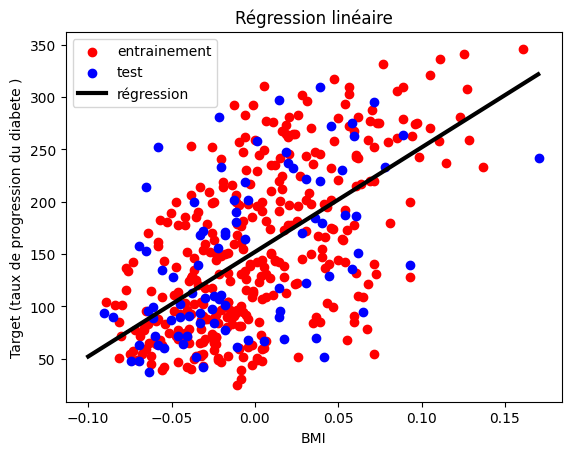

In [9]:
x = np.linspace(-0.1,0.17,100)
y = x*regr.coef_[0] + regr.intercept_

plt.scatter(x_train, y_train, c = 'r', label = 'entrainement')
plt.scatter(x_test, y_test, c = 'b', label = 'test')
plt.plot(x, y, c='k', linewidth = 3, label = 'régression')

plt.xlabel("BMI")
plt.ylabel("Target (taux de progression du diabete )")
plt.title("Régression linéaire")
plt.legend()
plt.show()

### Utilisation de toutes les features du dataset

Première façon de diviser les données en ensemble d'entrainement et en ensemble de test

In [10]:
x_train = data[:ratio]
x_test = data[ratio:]
print("Dimensions de l'ensemble d'entrainement (partie data) : ", x_train.shape)
print("Dimensions de l'ensemble de test (partie data) : ", x_test.shape)

y_train = target[:ratio]
y_test = target[ratio:]
print("Dimensions de l'ensemble d'entrainement (partie target) : ", y_train.shape)
print("Dimensions de l'ensemble de test (partie target) : ", y_test.shape)

Dimensions de l'ensemble d'entrainement (partie data) :  (353, 10)
Dimensions de l'ensemble de test (partie data) :  (89, 10)
Dimensions de l'ensemble d'entrainement (partie target) :  (353,)
Dimensions de l'ensemble de test (partie target) :  (89,)


Deuxième façon de diviser les données en ensemble d'entrainement et en ensemble de test

In [11]:
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.2,random_state=42)

Entrainement du modèle de Machine Learning sur l'ensemble d'entrainement

In [12]:
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train)

LinearRegression()

Calcul de l'erreur empirique sur l'ensemble de test

In [13]:
y_pred = regr.predict(x_test)
print("Erreur empirique sur l'ensemble de test : ", mean_squared_error(y_test,y_pred))

Erreur empirique sur l'ensemble de test :  2900.193628493482


Affichage des coefficients de la régression linéaire

In [14]:
print("Coefficients de la droite de régression : \n", regr.coef_)

Coefficients de la droite de régression : 
 [  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]


In [15]:
print("La feature la plus importante est", diabetes.feature_names[4])

La feature la plus importante est s1
